# Assignment 3

In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

#special packages
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


#### Problem 1: Read the Data
Description: Read in the data, use a delimiter to put data in seperate columns 
Import special packages to run regression 

In [3]:
clinton = pd.read_csv('http://www.stat.ufl.edu/~winner/data/clinton1.dat', delimiter='\s\s+',\
                     names=['County_Name', 'Percent_Voting', 'Median_Age','Mean_Savings','PerCapita_Income', \
'Percent_Poverty','Percent_Veterans', 'Percent_Female', 'Population_Density','Percent_NursingHome', 'Crime_Index'], engine='python')

clinton[:10]



,County_Name,Percent_Voting,Median_Age,Mean_Savings,PerCapita_Income,Percent_Poverty,Percent_Veterans,Percent_Female,Population_Density,Percent_NursingHome,Crime_Index
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
5,"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
6,"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
7,"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
8,"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51
9,"Chilton, AL",34.19,34.0,52230,14036,18.6,9.48,51.41,47.8,3.58,296


#### Problem 2: Predict Percent Voting on all regressors
Description: set up dmatrices, set up the model then fit it to find the p values. Identify 2 worst pvalues (highest pvalues)

The variables 'Median_Age' and 'Crime_Index' have the worst pvalues 

In [4]:
#set up dmatrices
y, X = dmatrices('Percent_Voting ~ Median_Age + Mean_Savings + PerCapita_Income + Percent_Poverty + \
Percent_Veterans + Percent_Female + Population_Density + Percent_NursingHome + Crime_Index', data = clinton, \
                          return_type='dataframe')
#set up model
model = sm.OLS(y, X)

#fit model
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:         Percent_Voting   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sat, 16 Apr 2016   Prob (F-statistic):          4.12e-224
Time:                        22:43:21   Log-Likelihood:                -9576.0
No. Observations:                2704   AIC:                         1.917e+04
Df Residuals:                    2694   BIC:                         1.923e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             -38.3094    

#### Problem 3: Formula Creating Function
Description: takes in a list of regressors. Creates a string called formula
that contains "percentVoting ~". Iterates through the regressor list. Adds each
regressor to the string with the appropriate punctuation. Returns the string

In [5]:
def formula(regressorList):
    # create string with the beginning of formula
    formula = "Percent_Voting ~"
    # iterate through regressor list
    for i in regressorList:
        # if it isn't the first regresssor added, add a + to the string and the regressor
        if formula[-1] != "~":
            formula = formula + " + " + i
        # if the last item in the list is a ~ (first regressor added)
        # add a space and the regressor
        else:
            formula = formula + " " + i
    return formula

print formula(["Median_Age","Mean_Savings"])
    

Percent_Voting ~ Median_Age + Mean_Savings


#### Problem 4: R-Squared Computation Function
Description: takes in a list of regressors. uses the form

In [6]:
def rsquared(regressorList):
    # create regression formula with the function
    regressionFormula = formula(regressorList)
    #set up dmatrices
    y, X = dmatrices(regressionFormula, data = clinton, return_type='dataframe')
    #set up model
    model = sm.OLS(y, X)

    #fit model
    result = model.fit()

    return result.rsquared

allRegressors = ["Median_Age", "Mean_Savings", "PerCapita_Income", "Percent_Poverty", \
"Percent_Veterans", "Percent_Female", "Population_Density", "Percent_NursingHome", "Crime_Index"]

print rsquared(allRegressors)
    

0.326900387252


#### Problem 5: Find the best regressor
Description:

#### Problem 6: Pick the K-best regressors
Description:

#### Problem 7: Order all regressors in the best order
Description:


#### Problem 8: Plot the R-squared values as regressors are added in the best order.
Description:

#### Problem 9: Create a classication target.
Description

In [46]:
#creates a column that will contain the targets, is intialized with all zeros
clinton['Target'] = 0.0
#create the mask to identify which of the records is a postive target or a 1
mask = clinton['Percent_Voting'] > 40.0 
clinton.ix[mask,'Target'] = 1.0
clinton[:5]




,County_Name,Percent_Voting,Median_Age,Mean_Savings,PerCapita_Income,Percent_Poverty,Percent_Veterans,Percent_Female,Population_Density,Percent_NursingHome,Crime_Index,Target
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,0.0
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,0.0
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,1.0
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,0.0
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,1.0


#### Problem 10: Create training and test sets.
Description: first i created the d matrices. then transferred those values from datatales to lists. then i split up those lists

In [41]:
#create the matrices
Y2,X2 = dmatrices('Target~ 0+Percent_Poverty+Population_Density',clinton, return_type="dataframe")
#the code above returns type dataframe, so we need to make them lists, so we can use them
y2_list = Y2['Target'].values
y2 = y2_list
x2 = X2.values 

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=.3,random_state=1)





#### Problem 11: Accuracy of classication
Description: Create loop to go through list of the number of nearest neighbors to be tested print results for each  nearest neighbors numbered used. 

In [42]:
# list of nearest neighbors numbers to use
n_neighbors = [1, 3, 5, 10, 20, 50, 100, 1000]
    
#loop to go through list
for i in n_neighbors:
        
        #seting up the classifier
        model_2 = neighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform', p=2)
        #fitting the model to the training data
        model_2.fit(x2_train,y2_train)


        ####

        #x2_train.iloc[0:5]
        #code above does not work becase i cant update canopy to 2.7.11
        print "n-neighbors =", i
        prediction_on_training = model_2.predict(x2_train)
        print 'Train Accuracy', metrics.accuracy_score(y2_train, prediction_on_training)


        prediction_on_test = model_2.predict(x2_test)
        print 'Test Accuracy', metrics.accuracy_score(y2_test, prediction_on_test)
        print '____________________________'

n-neighbors = 1
Train Accuracy 0.997885835095
Test Accuracy 0.600985221675
____________________________
n-neighbors = 3
Train Accuracy 0.788583509514
Test Accuracy 0.635467980296
____________________________
n-neighbors = 5
Train Accuracy 0.749471458774
Test Accuracy 0.630541871921
____________________________
n-neighbors = 10
Train Accuracy 0.720930232558
Test Accuracy 0.646551724138
____________________________
n-neighbors = 20
Train Accuracy 0.690803382664
Test Accuracy 0.658866995074
____________________________
n-neighbors = 50
Train Accuracy 0.684460887949
Test Accuracy 0.662561576355
____________________________
n-neighbors = 100
Train Accuracy 0.678118393235
Test Accuracy 0.663793103448
____________________________
n-neighbors = 1000
Train Accuracy 0.566596194503
Test Accuracy 0.570197044335
____________________________


#### Problem 12: Plots and Reasons
Description: 

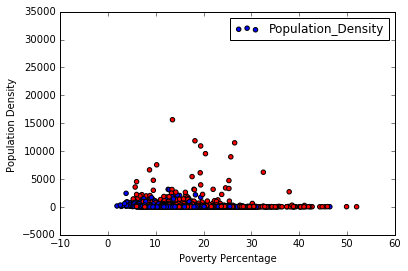

In [50]:
#plot the data, just to visualize it, not neccessary just wanted to see how it looks
sc = scatter(clinton['Percent_Poverty'],clinton['Population_Density'], c=y2, cmap= 'bwr')
xlabel('Poverty Percentage')

ylabel('Population Density ')
